In [1]:
from brains import SimpleBrain
from modules import *
from agents import SimpleAgent
from random import randint
import matplotlib.pyplot as plt
import torch

In [2]:
agent_args = {
    "start_args" : {
        "dim_in" : 15, 
        "hidden_dim" : 30,
        "dim_out" : 20, 
        "depth" : 3
    },

    "module_args" : {
        "First" : {
            "dim_in" : 20, 
            "hidden_dim" : 30,
            "dim_out" : 25, 
            "depth" : 3
        },
        
        "YA hz kak nazvat, eto output" : {
            "dim_in" : 25, 
            "hidden_dim" : 30,
            "dim_out" : 20, 
            "depth" : 3
        }
    },

    "modules" : {
        "First" : Numbered_MLP,
        "YA hz kak nazvat, eto output" : Numbered_MLP
    }
}

In [3]:
# This function should be rewrite after env would be build
def loss(action, reward):
    return torch.cat(action).sum() * reward

In [5]:
brain = SimpleBrain(35, loss, SimpleAgent, agent_args)

In [6]:
# There is an example of use of Brain, we need new class to manage this with
# Also we need environment in that class

num_games = 100
n_players = 9

utg_losses = []
hj_losses = []

for game in range(num_games):
    if game % 5 == 0:
        brain.sit(n_players, list(range(3, 20, 2)))

    actions = {i : [] for i in range(n_players)}
    
    #preflop, there is only utg and hj in a game
    actions[0].append(brain.step(0, 3))
    actions[4].append(brain.step(4, 5))

    #flop
    actions[0].append(brain.step(0, 1))
    actions[4].append(brain.step(4, 9))
    actions[0].append(brain.step(0, 11))

    #turn
    actions[0].append(brain.step(0, 14))
    actions[4].append(brain.step(4, 3))

    #river
    actions[0].append(brain.step(0, 5))
    actions[4].append(brain.step(4, 9))

    utg_losses.append(brain.train(0, actions[0], 1))
    hj_losses.append(brain.train(4, actions[4], -1))

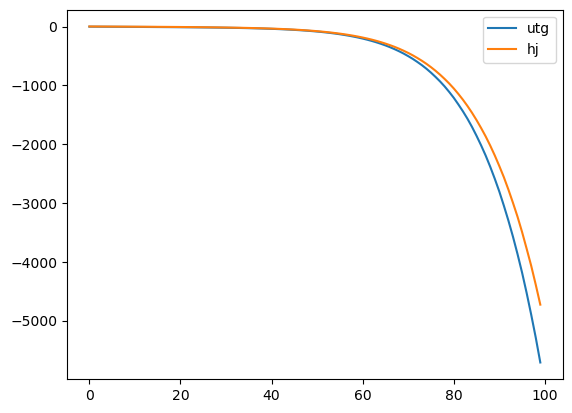

In [7]:
plt.plot(utg_losses, label = "utg")
plt.plot(hj_losses, label = "hj")
plt.legend()
plt.show()

In [8]:
print("Yes daddy")

Yes daddy
